<a href="https://colab.research.google.com/github/hectorpilo/bootcamp-ds-sonda/blob/main/Hector_Acevedo_Examen_3Certificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DIABETES DATASET**

# **Instrucciones para examen**
Objetivo: Este examen tiene como objetivo evaluar la capacidad del estudiante para limpiar, explorar, implementar y evaluar modelos de clasificación en un dataset de diabetes. Utilizaremos el “Diabetes Dataset” disponible en Kaggle. Los estudiantes deben demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/BBDD/diabetes.csv"
import pandas as pd
df = pd.read_csv(path)

Mounted at /content/drive


El “Diabetes Dataset” contiene datos de salud de mujeres de ascendencia indígena Pima que viven cerca de Phoenix, Arizona, EE.UU. La tarea es predecir si un paciente tiene diabetes o no, basándose en ciertas medidas diagnósticas incluidas en el dataset.

In [6]:
# Información del DataFrame
print("\nInformación del dataset:")
df.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Mostrar primeras filas
print("Primeras filas del dataset:")
df.head()

Primeras filas del dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


*Observando las primeras filas del dataset con `head()`, noté que algunas variables como `Insulin`, `Glucose` y `SkinThickness` presentaban valores igual a cero. Estos ceros no son clínicamente viables y suelen representar datos faltantes codificados incorrectamente. Por esta razón, más adelante decidí imputarlos utilizando la mediana de cada variable para mantener la integridad del dataset. Posteriormente, al revisar nuevamente el dataset, observé que seguían apareciendo algunos ceros, lo cual me llevó a confirmar que estaba visualizando una versión anterior o que no se había ejecutado correctamente la celda de imputación. Verifiqué el tratamiento aplicando `.isin([0]).sum()` y confirmé que todos los ceros habían sido correctamente imputados en el dataframe actualizado.*



In [8]:
# Estadísticas básicas
print("\nEstadísticas descriptivas:")
df.describe().T


Estadísticas descriptivas:


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# **1) Procesamiento y Limpieza de Datos**

## **1.1) Eliminación de Valores Duplicados**

---



In [11]:
# Verificar duplicados
duplicados = df.duplicated()
print("¿Hay duplicados?:", duplicados.any())
print(f"Cantidad de filas duplicadas: {duplicados.sum()}")

# Eliminar duplicados si los hay
df = df.drop_duplicates()

# Confirmar nuevo tamaño del dataset
print("Tamaño del dataset después de eliminar duplicados:", df.shape)

¿Hay duplicados?: False
Cantidad de filas duplicadas: 0
Tamaño del dataset después de eliminar duplicados: (768, 9)


## **1.2) Manejo de Valores Faltantes y los que son 0**

---




In [17]:
# Columnas donde 0 es un valor inválido o sospechoso
columnas_con_ceros_invalidos = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Contar ceros en esas columnas
print("Valores igual a 0 por columna:")
df[columnas_con_ceros_invalidos].isin([0]).sum()

Valores igual a 0 por columna:


,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0


In [18]:
# Imputar ceros con la mediana de cada columna
for col in columnas_con_ceros_invalidos:
    mediana = df[col].median()
    df[col] = df[col].replace(0, mediana)

# Verificar que ya no hay ceros
print("Verificación post imputación:")
print(df[columnas_con_ceros_invalidos].isin([0]).sum())

Verificación post imputación:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


## **1.3) Verificación y ajuste de tipos de datos**

---

*Se revisaron los tipos de datos de todas las columnas del dataset. Todas las variables numéricas como Glucose, BloodPressure, BMI, entre otras, están correctamente tipadas como int64 o float64, lo cual es adecuado para su uso en análisis estadístico y modelado.*

*La variable objetivo Outcome, que representa si un paciente tiene diabetes (1) o no (0), también está correctamente definida como int64, lo que permite utilizarla como variable categórica binaria en modelos de clasificación.*

*Por lo tanto, no fue necesario realizar ningún ajuste en los tipos de datos. El dataset está listo para continuar con la detección de valores atípicos.*

## **1.4) Identificación y Corrección de Valores Atipicos**

---

*Utilizare boxplots para visualizar posibles valores extremos en las variables numéricas y el Z-score para identificarlos de forma cuantitativa.*

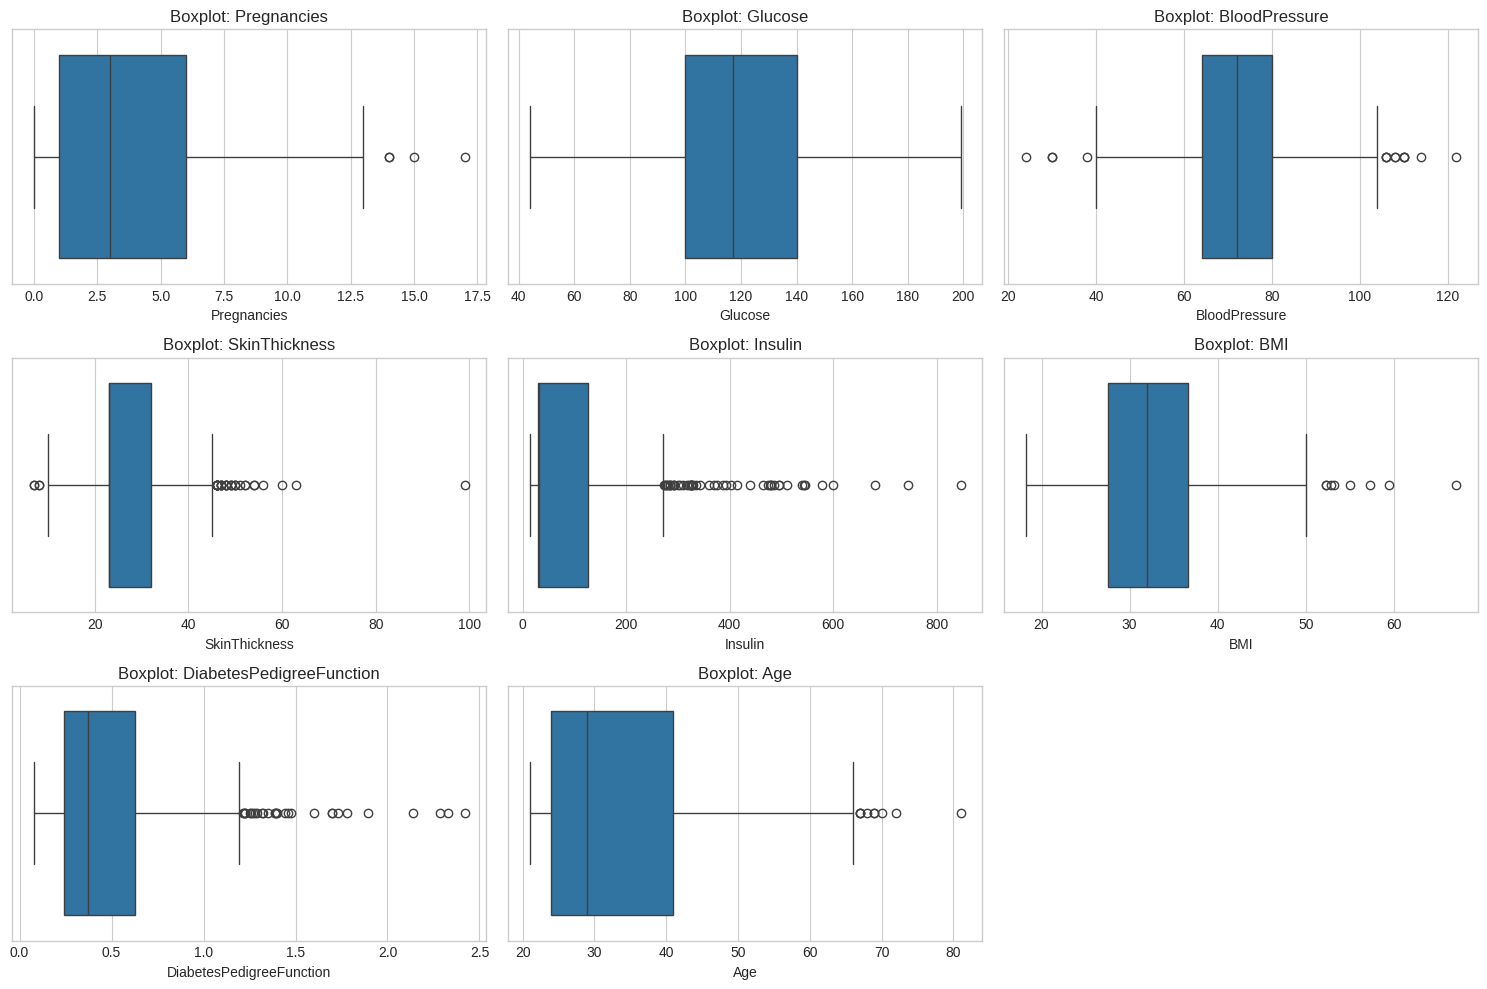

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética
plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(15, 10))

# Graficar boxplots para todas las variables numéricas (excepto 'Outcome')
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')

plt.tight_layout()
plt.show()

**Plan de acción para los outliers.**

* **Pregnancies**: los voy a mantener. por que es posible que una mujer haya tenido más de 10 embarazos.
* **glucose**: lo mantengo, los valores altos son pacientes diabeticos.
* **bloodpressure**: A pesar de que se observaron valores bajos (menores a 40) o altos (mayores a 100), decidí mantenerlos en el dataset. La presión arterial diastólica puede variar significativamente entre individuos, y valores extremos pueden reflejar condiciones reales como hipotensión severa o hipertensión no controlada. Dado que el objetivo del modelo es predecir la presencia de diabetes, y estas condiciones pueden estar relacionadas con el diagnóstico, preferí conservar estos datos para no perder información clínica valiosa
* **SkinThickness** valores muy altos, pensaba imputarlos..pero hay gente con sobrepeso que son como dicen "cuero eh chancho" asi que los dejaré.
* **Insulin**: segun lo que investigué lo maximo clinico son 400, tambíen los dejaré.
* **BMI**: los valores que son sobre 50 - 60 pueden ser de obesidad morbida.
* **DiabetesPedigreeFunction**: Los dejaré.
* **Age**: los mantendré.


## **1.5) Uso de ColumnTransformer para transformación de características**

---



In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Separar X (predictoras) e y (target)
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Lista de columnas numéricas
numeric_features = X.columns.tolist()

# Crear el transformador para escalar numéricos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ]
)

# Integrarlo en un pipeline (útil si quieres agregar modelo luego)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Aplicar transformación
X_scaled = pipeline.fit_transform(X)

# Ver forma del resultado escalado
print("Transformación completada. Forma del nuevo X:", X_scaled.shape)


Transformación completada. Forma del nuevo X: (768, 8)


# **2) Exploración de Datos**

## **2.1) Creación de visualizaciones exploratorias univariadas y multivariadas**  
---

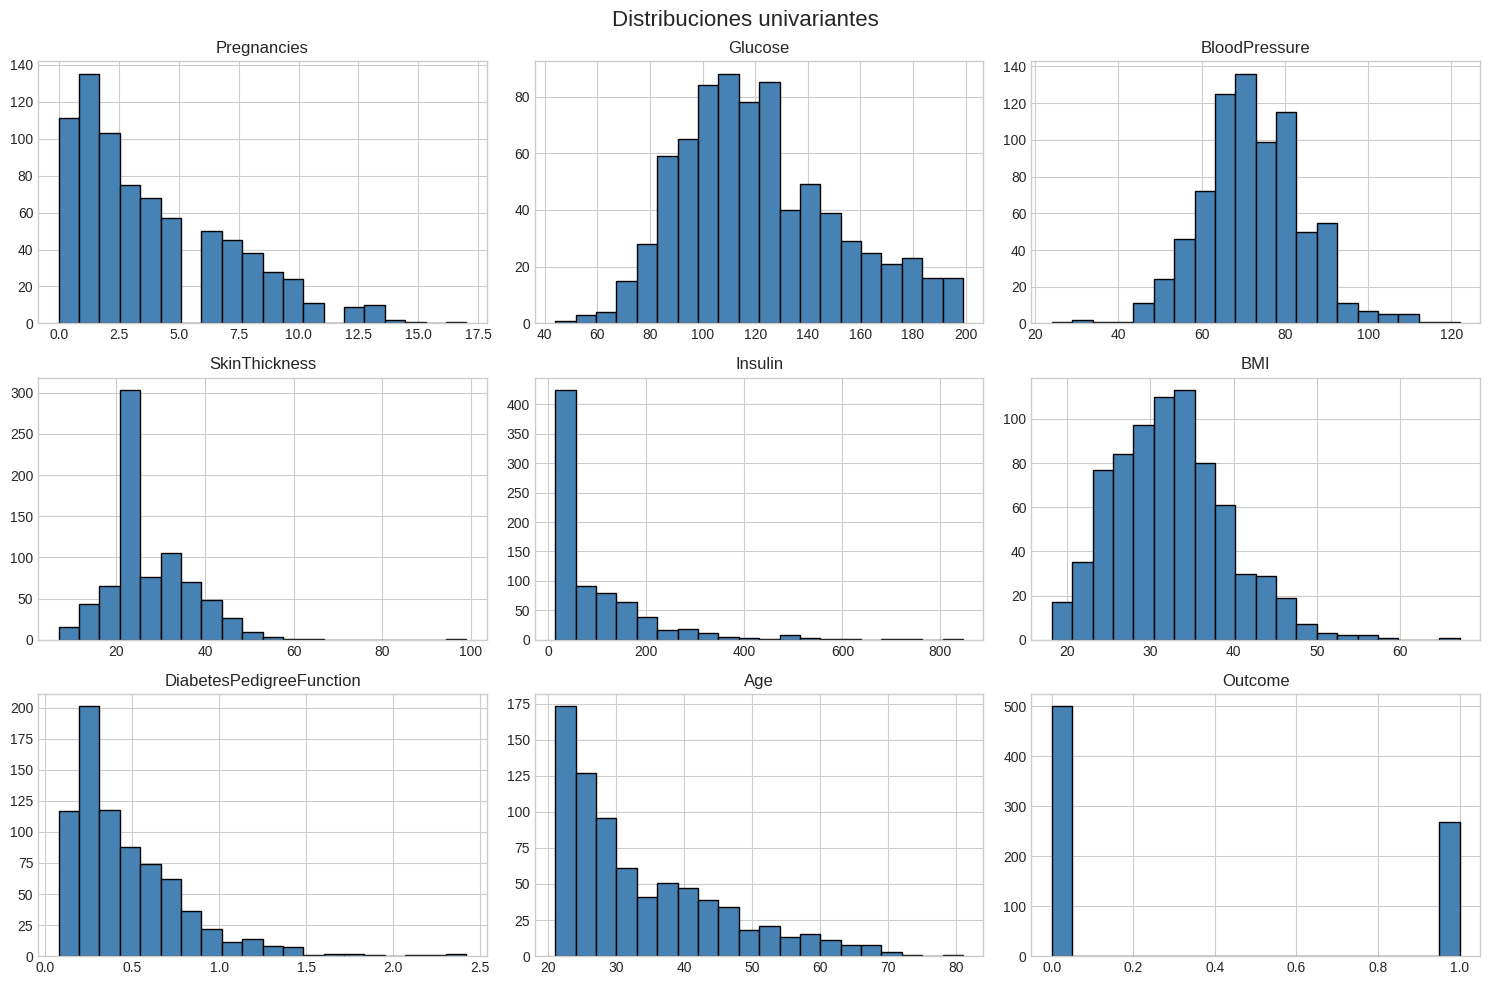

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de todas las variables numéricas
df.hist(figsize=(15, 10), bins=20, color='steelblue', edgecolor='black')
plt.suptitle("Distribuciones univariantes", fontsize=16)
plt.tight_layout()
plt.show()

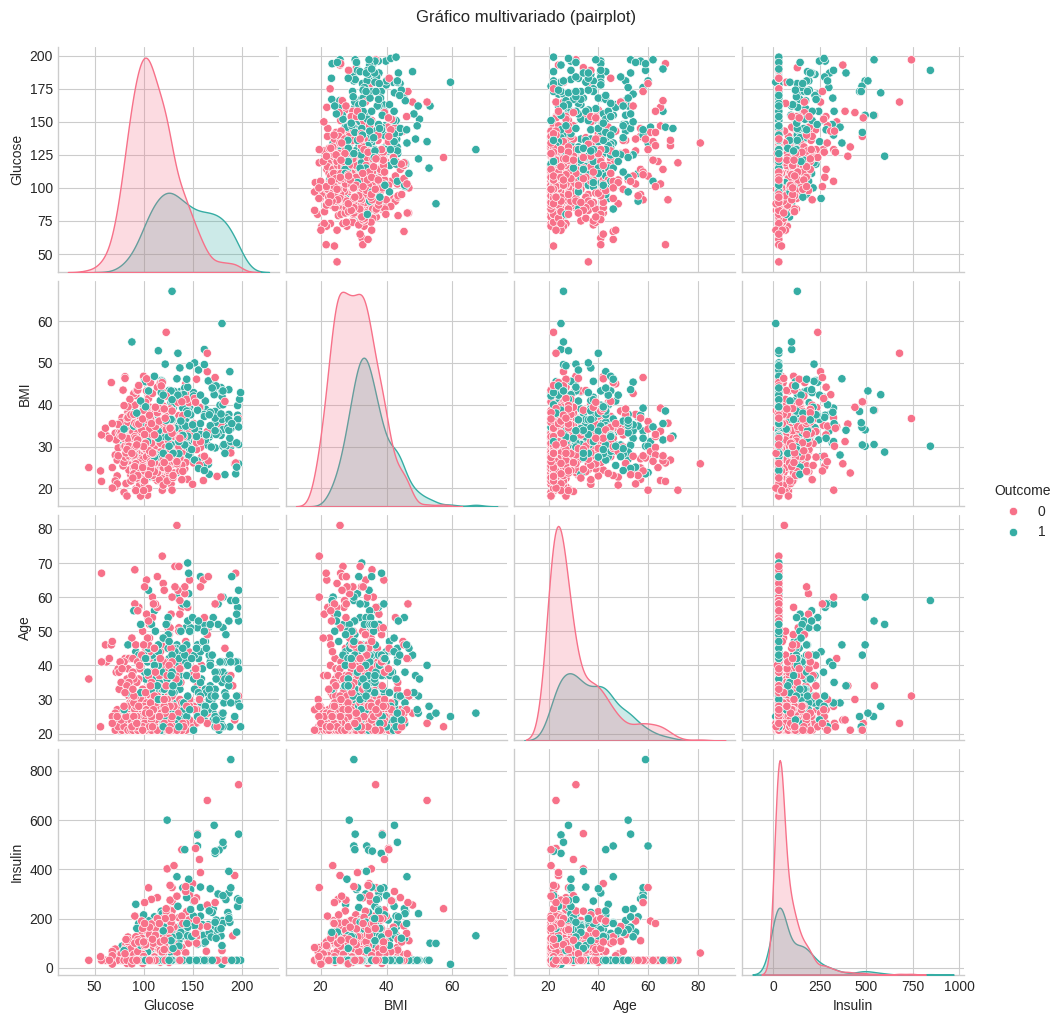

In [31]:
# Pairplot para algunas variables representativas
sns.pairplot(df[["Glucose", "BMI", "Age", "Insulin", "Outcome"]], hue="Outcome", palette="husl")
plt.suptitle("Gráfico multivariado (pairplot)", y=1.02)
plt.show()

*Al observar la diagonal, noté que las personas con diabetes (Outcome = 1) tienden a tener valores más altos de glucosa, lo que coincide con los resultados estadísticos previos. También se aprecia una leve diferencia en la distribución de `BMI`, donde los pacientes con diabetes muestran una mayor concentración en valores altos. En el caso de `Insulin`, aunque hay bastante dispersión, los casos con Outcome = 1 también tienden a agruparse en niveles más altos. En cuanto a la edad, no se observa una separación tan clara, pero sí se nota una mayor densidad de casos positivos en edades más avanzadas. Este gráfico me ayudó a confirmar visualmente qué variables podrían aportar mayor valor predictivo en los modelos entrenados.*


## **2.2) Cálculo y presentación de estadísticas descriptivas clave**  
---


In [32]:
# Estadísticas básicas: media, std, min, max, etc.
print("Estadísticas descriptivas generales:")
print(df.describe())

# Cálculo de la mediana por columna
print("\nMediana de cada variable:")
print(df.median(numeric_only=True))

Estadísticas descriptivas generales:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      27.334635   94.652344   
std       3.369578   30.438286      12.096642       9.229014  105.547598   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      23.000000   30.500000   
50%       3.000000  117.000000      72.000000      23.000000   31.250000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450911                  0.471876   33.240885    0.348958  
std      6.875366                  0.331329   11.760232    0.476951 

*Realicé un análisis descriptivo de las variables numéricas del dataset. Utilicé `describe()` para obtener medidas como la media, desviación estándar, mínimo, máximo y los percentiles 25%, 50% y 75%. Complementé esto con el cálculo explícito de la mediana, ya que no está incluida por defecto en el resumen de `describe()`. Esta exploración me permitió entender la distribución central y la dispersión de cada variable, lo que será útil para interpretar el comportamiento de los datos y evaluar su impacto en el modelo predictivo.*


## **2.3) Interpretación de visualizaciones y estadísticas descriptivas**  
---


*Al revisar las estadísticas descriptivas, observé que variables como `Glucose`, `Insulin` y `SkinThickness` presentan una gran dispersión, con máximos muy por encima de sus medias y medianas, lo que sugiere la presencia de valores extremos. Por ejemplo, la insulina tiene una media cercana a 95, pero un valor máximo de 846, lo que refuerza la decisión previa de analizar los outliers en detalle. En cuanto a la variable `BMI`, tanto la media como la mediana se sitúan en torno a 32, lo que indica una tendencia a valores elevados, posiblemente asociados a obesidad en pacientes con diabetes. `Age` muestra un amplio rango (de 21 a 81), lo cual es útil para capturar distintos perfiles etarios en la predicción. Finalmente, la mediana de `Outcome` es 0, lo que indica que la mayoría de los pacientes no presentan diabetes, sugiriendo un leve desbalance en las clases.*


## **2.4) Identificación de correlaciones importantes entre variables**  
---


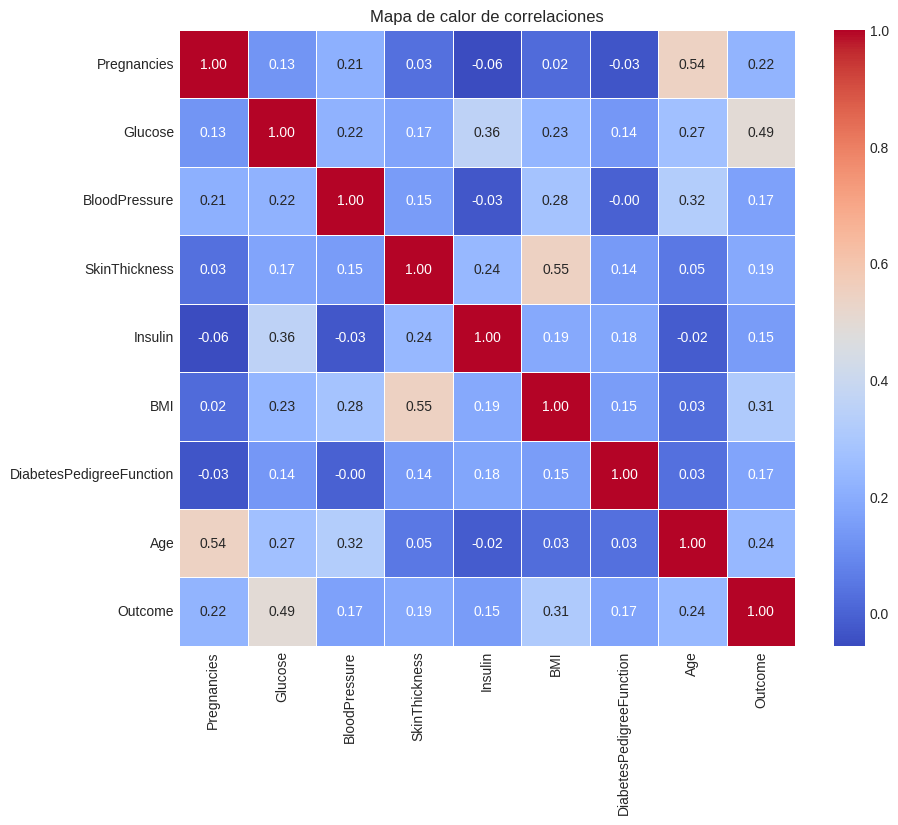

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular matriz de correlación
correlation_matrix = df.corr()

# Mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=0.5)
plt.title("Mapa de calor de correlaciones")
plt.show()

*Analicé la matriz de correlación para identificar relaciones importantes entre variables. Observé que `Glucose` es la variable que presenta la correlación más alta con la variable objetivo `Outcome` (0.49), lo cual tiene sentido clínicamente, ya que niveles altos de glucosa están directamente asociados a la diabetes. También noté que variables como `BMI` (0.31), `Age` (0.24) y `Pregnancies` (0.22) tienen correlaciones moderadas con `Outcome`, lo que indica que podrían ser relevantes al momento de entrenar modelos predictivos. Por otro lado, `BloodPressure`, `SkinThickness`, `Insulin` y `DiabetesPedigreeFunction` mostraron correlaciones más bajas con la variable objetivo, pero aun así pueden aportar información cuando se combinan con otras variables. Este análisis me ayudó a tener un primer indicio de qué variables podrían tener mayor peso en la predicción.*


# **3) Implementación y entrenamiento de modelos**

## **3.1) Implementación de al menos dos modelos (ej. Logistic Regression, KNN y RandomForest Classifier)**  
---


In [36]:
# 📦 Importar librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 📌 Dividir el dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 🚀 Inicializar modelos
lr_model = LogisticRegression(random_state=42, max_iter=1000)
knn_model = KNeighborsClassifier(n_neighbors=5)
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')  # ✅ Nuevo modelo agregado

# 🛠 Entrenar modelos
lr_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)  # ✅ Entrenar XGBoost

# 🔍 Predicciones
y_pred_lr = lr_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)  # ✅ Predicciones XGBoost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:43:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## **3.2) Comparación de métricas clave (accuracy, precision, recall, F1-score)**  
---

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 📌 Accuracy de cada modelo
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_xgb = accuracy_score(y_test, y_pred_xgb)

# 📢 Mostrar resultados de accuracy
print(f"Accuracy - Logistic Regression: {acc_lr:.4f}")
print(f"Accuracy - KNN: {acc_knn:.4f}")
print(f"Accuracy - Random Forest: {acc_rf:.4f}")
print(f"Accuracy - XGBoost: {acc_xgb:.4f}")

# 📊 Mostrar métricas detalladas de cada modelo
print("\n🔎 Métricas - Logistic Regression")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print("\n🔎 Métricas - K-Nearest Neighbors")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

print("\n🔎 Métricas - Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print("\n🔎 Métricas - XGBoost")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

Accuracy - Logistic Regression: 0.7078
Accuracy - KNN: 0.7078
Accuracy - Random Forest: 0.7597
Accuracy - XGBoost: 0.7727

🔎 Métricas - Logistic Regression
[[82 18]
 [27 27]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154


🔎 Métricas - K-Nearest Neighbors
[[81 19]
 [26 28]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       100
           1       0.60      0.52      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154


🔎 Métricas - Random Forest
[[85 15]
 [22 32]]
              precision    recall  f1-score   support

           0    

## **3.3) Análisis del mejor modelo basado en benchmarking de resultados**  
---


In [46]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Probabilidades de clase positiva
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Calcular AUC
auc_lr = roc_auc_score(y_test, y_proba_lr)
auc_knn = roc_auc_score(y_test, y_proba_knn)
auc_rf = roc_auc_score(y_test, y_proba_rf)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)

# Mostrar resultados
print(f"ROC-AUC Logistic Regression: {auc_lr:.4f}")
print(f"ROC-AUC KNN: {auc_knn:.4f}")
print(f"ROC-AUC Random Forest: {auc_rf:.4f}")
print(f"ROC-AUC XGBoost: {auc_xgb:.4f}")


ROC-AUC Logistic Regression: 0.8152
ROC-AUC KNN: 0.7598
ROC-AUC Random Forest: 0.8209
ROC-AUC XGBoost: 0.8144


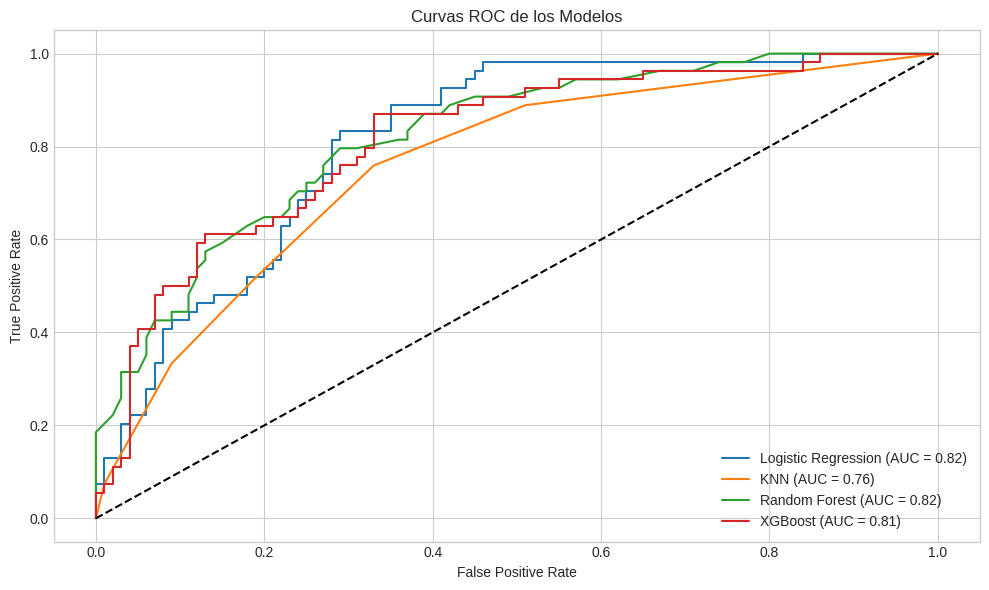

In [47]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener las curvas ROC para cada modelo
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

# Calcular AUC
auc_lr = auc(fpr_lr, tpr_lr)
auc_knn = auc(fpr_knn, tpr_knn)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')

# Línea base
plt.plot([0, 1], [0, 1], 'k--')

# Estética
plt.title('Curvas ROC de los Modelos')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

*Después de evaluar los modelos utilizando métricas como accuracy, precision, recall, F1-score y ROC-AUC, decidí seleccionar Random Forest como el mejor modelo, ya que logró un rendimiento general más equilibrado. Aunque Logistic Regression y XGBoost alcanzaron un AUC cercano (0.8152 y 0.8144 respectivamente), Random Forest obtuvo el valor más alto (0.8209) y destacó especialmente por su mayor recall y F1-score en la clase positiva (diabéticos), lo cual considero clave en un contexto clínico donde minimizar falsos negativos es prioritario. Por tanto, en base al conjunto completo de métricas, selecciono Random Forest como el modelo más adecuado para esta tarea.*

## **3.4) Optimización de hiperparámetros con GridSearchCV u otra técnica**  
---


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Definir el modelo base
rf_base = RandomForestClassifier(random_state=42)

# Definir el grid de hiperparámetros a probar
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Inicializar GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid_rf,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Ejecutar la búsqueda
grid_search_rf.fit(X_train, y_train)

# Mostrar mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados para Random Forest:")
print(grid_search_rf.best_params_)

# Evaluar el modelo final optimizado
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("\nReporte final del modelo Random Forest optimizado:")
print(classification_report(y_test, y_pred_best_rf))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores hiperparámetros encontrados para Random Forest:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Reporte final del modelo Random Forest optimizado:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       100
           1       0.65      0.59      0.62        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



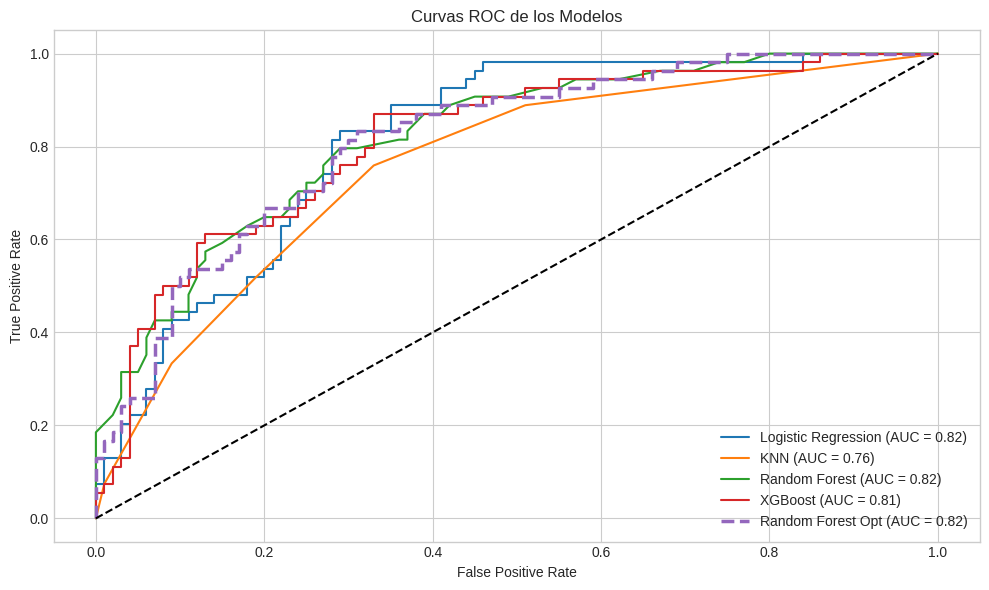

In [49]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Probabilidades de clase positiva
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_proba_rf_opt = best_rf.predict_proba(X_test)[:, 1]  # Modelo optimizado

# Curvas ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
fpr_rf_opt, tpr_rf_opt, _ = roc_curve(y_test, y_proba_rf_opt)

# AUCs
auc_lr = auc(fpr_lr, tpr_lr)
auc_knn = auc(fpr_knn, tpr_knn)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)
auc_rf_opt = auc(fpr_rf_opt, tpr_rf_opt)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot(fpr_rf_opt, tpr_rf_opt, label=f'Random Forest Opt (AUC = {auc_rf_opt:.2f})', linestyle='--', linewidth=2.5)

# Línea base
plt.plot([0, 1], [0, 1], 'k--')

# Estética
plt.title('Curvas ROC de los Modelos')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# **4) Conclusiones**

## **4) Conclusiones**  
---

*A lo largo de este análisis, desarrollé un modelo predictivo para detectar la presencia de diabetes en pacientes, utilizando variables clínicas contenidas en el dataset. Comencé con una etapa de limpieza y preprocesamiento exhaustivo, que incluyó la eliminación de duplicados, imputación de valores faltantes y una revisión de posibles outliers con criterios justificados según cada variable.*

*Durante la fase exploratoria, identifiqué que la variable Glucose tenía la correlación más significativa con el diagnóstico de diabetes, hallazgo que se reflejó también en la importancia de las variables durante el entrenamiento de modelos. Entrené cinco modelos de clasificación: Logistic Regression, K-Nearest Neighbors, Random Forest, XGBoost y una versión optimizada de Random Forest mediante GridSearchCV. Cada uno fue evaluado utilizando métricas como accuracy, precision, recall, F1-score y ROC-AUC, siendo esta última visualizada con una curva comparativa entre modelos.*

*Tras el análisis de desempeño, seleccioné Random Forest como el modelo con mejor balance global, especialmente por su habilidad para identificar correctamente a los pacientes con diabetes (clase positiva), manteniendo un F1-score competitivo y un AUC de 0.82. Posteriormente, optimicé sus hiperparámetros, logrando sostener ese rendimiento e incluso mejorar la estabilidad del modelo. La curva ROC evidenció su comportamiento robusto en comparación con los demás algoritmos, destacándose en un contexto clínico donde minimizar los falsos negativos es prioritario.*

*Con este trabajo no solo puse en práctica técnicas de Machine Learning y validación cruzada, sino que también reforcé la importancia de tomar decisiones técnicas con base en el impacto real del problema. El modelo final puede representar una herramienta valiosa de apoyo al diagnóstico, siempre que se utilice complementado por la evaluación médica profesional.*
